In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import cv2
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import os


In [2]:
images_folder = "dataset/images/*.jpg"
images = glob.glob(images_folder)

print(f"Number of Images in Dataset: {len(images)}")

Number of Images in Dataset: 712


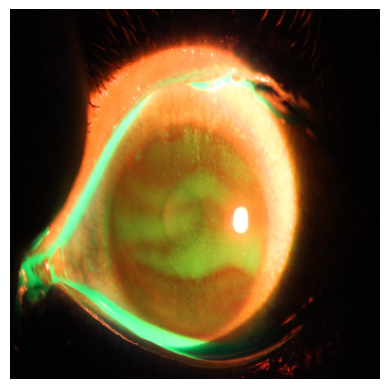

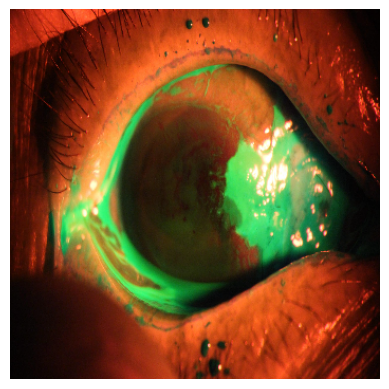

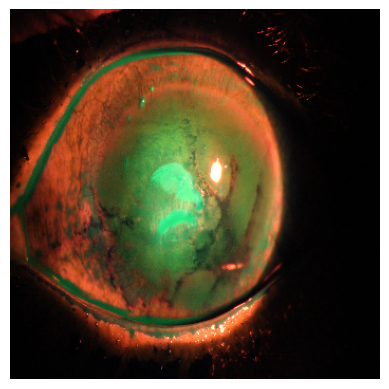

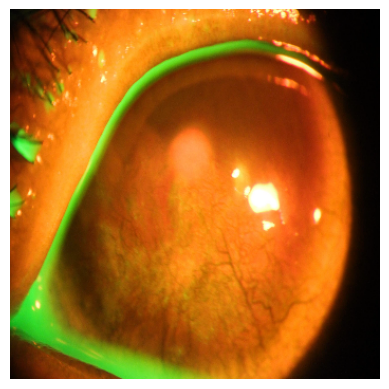

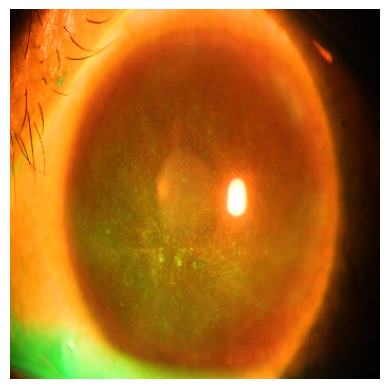

In [3]:
def plot_images(data,num_images):
    for i in range(num_images):
        random_image = random.choice(data)
        plt.imshow(cv2.resize(cv2.imread(random_image),(350,350)))
        plt.axis("off")
        plt.show()
plot_images(images,5)

In [4]:
images_labels = pd.read_csv("dataset/labels.csv")
images_labels.head()

,name,category,type,grade
0,1.jpg,0,4,3
1,2.jpg,0,4,3
2,3.jpg,0,2,2
3,4.jpg,0,2,1
4,5.jpg,0,1,3


In [5]:
Type_of_diseases = pd.unique(images_labels["type"])
print("The number of types of eye diseases {}".format(len(Type_of_diseases)))
Type_of_category = pd.unique(images_labels["category"])
print("The number of category of eye diseases {}".format(len(Type_of_category)))

The number of types of eye diseases 5
The number of category of eye diseases 3


In [6]:
dic={}
for i in Type_of_diseases:
    dic[i]=images_labels['type'].value_counts()[i]
dic_category={}
for j in Type_of_category:
    dic_category[j]=images_labels['category'].value_counts()[j]
print(dic)
print(dic_category)

{4: 548, 2: 40, 1: 78, 0: 36, 3: 10}
{0: 358, 1: 263, 2: 91}


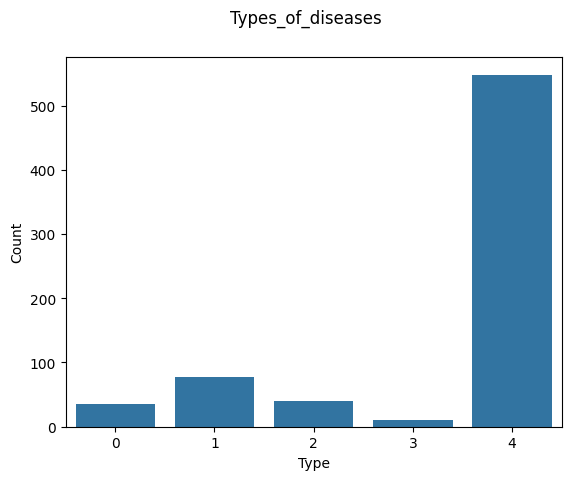

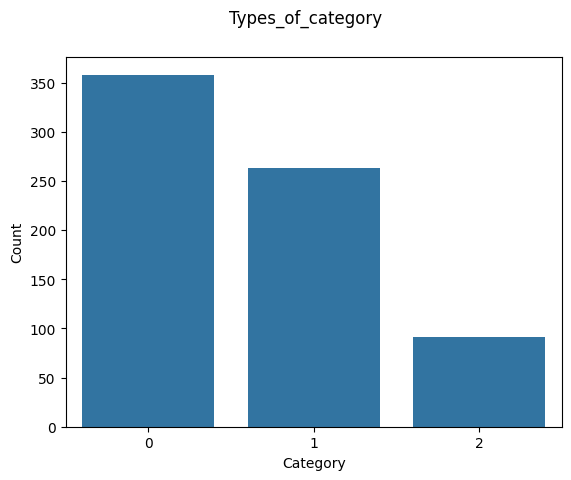

In [7]:
sns.barplot(x = list(dic.keys()), y = list(dic.values()))
plt.suptitle("Types_of_diseases")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()
sns.barplot(x = list(dic_category.keys()), y = list(dic_category.values()))
plt.suptitle("Types_of_category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

## Details of Types of Disease and Categories: 
### Category
1. point-like corneal ulcers
2. point-flaky mixed corneal ulcers
3. flaky corneal ulcers
### Types
1. type 0 : No ulcer of the corneal epithelium
2. type 1 : Micro punctate
3. type 2 : Macro punctate
4. type 3 : Coalescent macro punctate
5. type 4 : Patch (>=1 mm)
### Grade
1. grade 0 : No ulcer of the corneal epithelium
2. grade 1 : Corneal ulcers involve only one surrounding quadrant
3. grade 2 : Corneal ulcers involve two surrounding quadrants
4. grade 3 : Corneal ulcers involve three or four surrounding quadrants
5. grade 4 : Corneal ulcers involve the central optical zone of the cornea

## Analysis of Types

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import cv2
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [8]:
images_labels

,name,category,type,grade
0,1.jpg,0,4,3
1,2.jpg,0,4,3
2,3.jpg,0,2,2
3,4.jpg,0,2,1
4,5.jpg,0,1,3
...,...,...,...,...
707,708.jpg,2,2,4
708,709.jpg,2,2,4
709,710.jpg,2,1,4
710,711.jpg,2,3,4


In [9]:
category_1_images=[]
category_2_images=[]
category_3_images=[]
for i in range(len(images_labels.category)):
    if images_labels.category[i]==0:
        category_1_images.append(images[i])
    elif images_labels.category[i]==1:
        category_2_images.append(images[i])
    elif images_labels.category[i]==2:
        category_3_images.append(images[i])

In [10]:
print(len(category_1_images)+len(category_2_images)+len(category_3_images))

712


In [11]:
images_base_path = "dataset/Category"
category_1_path = os.path.join(images_base_path, 'Category_1')
category_2_path = os.path.join(images_base_path, 'Category_2')
category_3_path = os.path.join(images_base_path, 'Category_3')

os.makedirs(category_1_path, exist_ok=True)
os.makedirs(category_2_path, exist_ok=True)
os.makedirs(category_3_path, exist_ok=True)

In [14]:
import shutil
import warnings
warnings.filterwarnings("ignore")
import random

In [15]:

destination_path_category_1 = 'dataset/Category/Category_1'
destination_path_category_2 = 'dataset/Category/Category_2'
destination_path_category_3 = 'dataset/Category/Category_3'

# Copy images in category_1_images to the Category_1 folder
for i in category_1_images:
    shutil.copy2(i, destination_path_category_1)

# Copy images in category_2_images to the Category_2 folder
for i in category_2_images:
    shutil.copy2(i, destination_path_category_2)

# Copy images in category_3_images to the Category_3 folder
for i in category_3_images:
    shutil.copy2(i, destination_path_category_3)

In [16]:
local_test_cat_1 = 'dataset/Test_Category/Category_1'
local_test_cat_2 = 'dataset/Test_Category/Category_2'
local_test_cat_3 = 'dataset/Test_Category/Category_3'

os.makedirs(local_test_cat_1, exist_ok=True)
os.makedirs(local_test_cat_2, exist_ok=True)
os.makedirs(local_test_cat_3, exist_ok=True)

for i in range(100):
    ran = random.choice(category_1_images)
    shutil.copy2(ran, local_test_cat_1)
    
    ran_1 = random.choice(category_2_images)
    shutil.copy2(ran_1, local_test_cat_2)
    
    ran_3 = random.choice(category_3_images)
    shutil.copy2(ran_3, local_test_cat_3)

### CNN Modelling

In [17]:
train_dataset_path = 'dataset/Category'
validation_dataset_path = 'dataset/Test_Category'

In [19]:
IMG_WIDTH = 150
IMG_HEIGHT = 150
BATCH_SIZE = 32
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                  zoom_range=0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(train_dataset_path,
                                                   target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                   batch_size=BATCH_SIZE,
                                                   class_mode='categorical',
                                                   shuffle=True)

Found 712 images belonging to 3 classes.


In [20]:
validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory(validation_dataset_path,
                                                             target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                             batch_size=BATCH_SIZE,
                                                             class_mode='categorical',
                                                             shuffle=True)

Found 235 images belonging to 3 classes.


In [21]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")
    

Label Mappings for classes present in the training and validation datasets

0 : Category_1
1 : Category_2
2 : Category_3


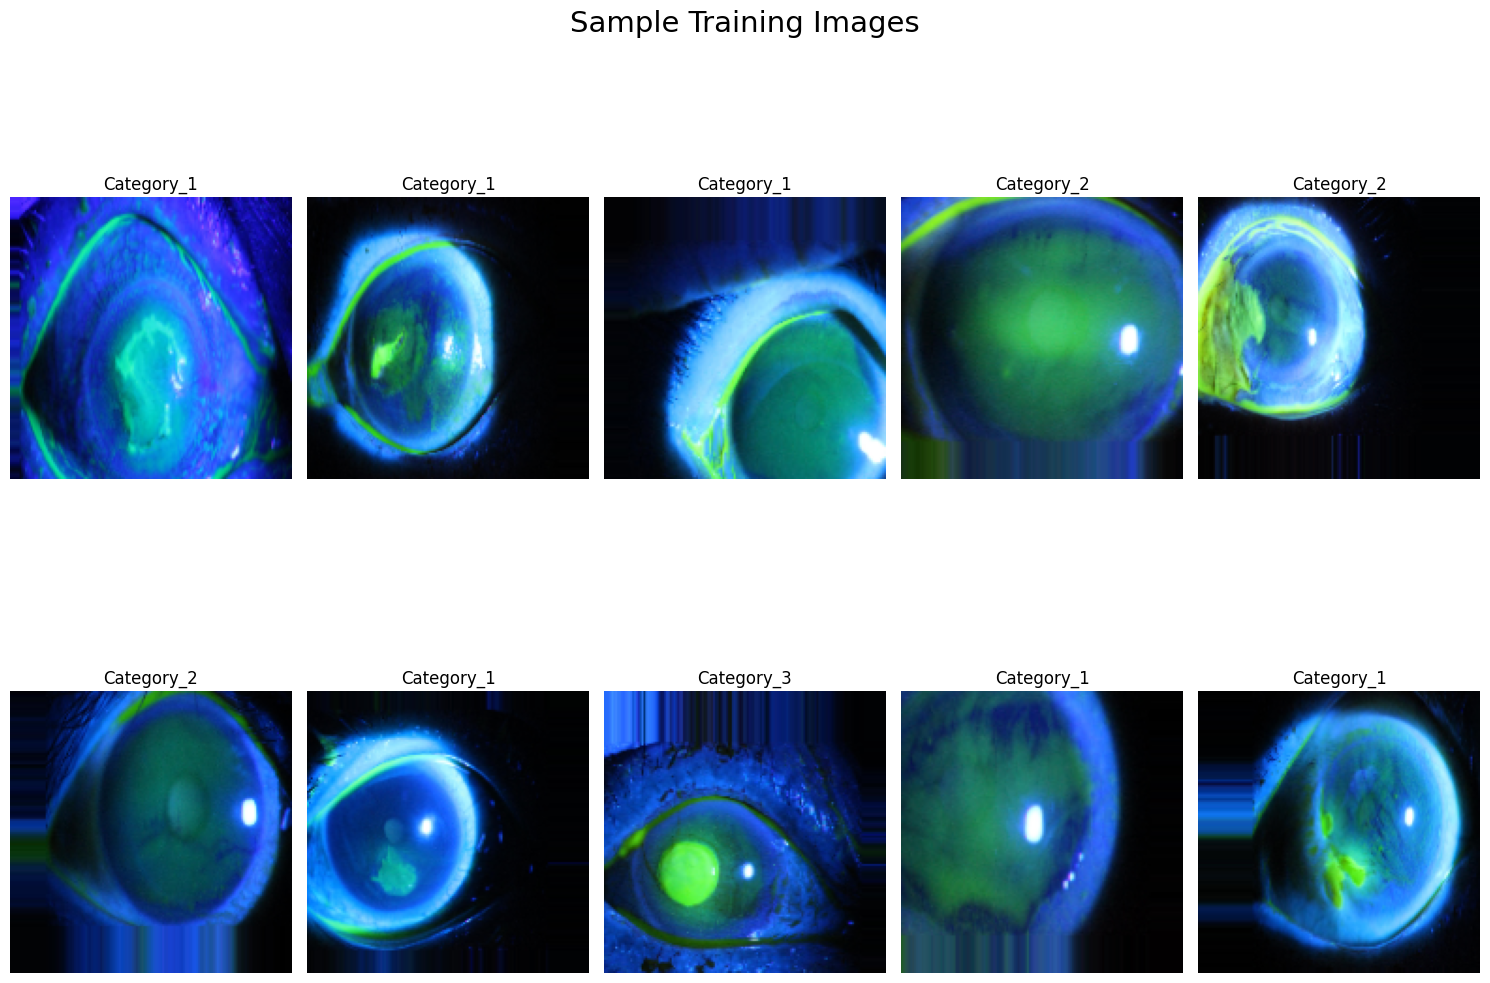

In [22]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 12))
idx = 0

for i in range(2):
    for j in range(5):
        label = labels[np.argmax(train_generator[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_generator[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

### Building CNN

In [30]:
def create_model():
    model = Sequential([
        Conv2D(filters=128, kernel_size=(3, 3), input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
        Conv2D(filters=128, kernel_size=(3, 3), input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.2),
        
        Conv2D(filters=64, kernel_size=(3, 3), kernel_regularizer=l2(0.00005)),
        Conv2D(filters=64, kernel_size=(3, 3), kernel_regularizer=l2(0.00005)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.2),
        
        Conv2D(filters=32, kernel_size=(3, 3), kernel_regularizer=l2(0.00005)),
        Conv2D(filters=32, kernel_size=(3, 3), kernel_regularizer=l2(0.00005)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.2),
        
        Flatten(),
        
        Dense(units=256, activation='relu'),
        Dropout(0.5),
        Dense(units=3, activation='softmax')
    ])
    
    return model

In [31]:
cnn_model = create_model()


In [32]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 148, 148, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 146, 146, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 146, 146, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 73, 73, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 73, 73, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 71, 71, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 69, 69, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 69, 69, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,843,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,133,827 (8.14 MB)

 Trainable params: 2,133,827 (8.14 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5)

In [38]:
optimizer = Adam(learning_rate=0.001)

In [39]:
cnn_model.compile(optimizer=optimizer, loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [40]:
history = cnn_model.fit(train_generator, epochs=10, validation_data=validation_generator,
                        verbose=2,
                       callbacks=[reduce_lr])

Epoch 1/10
23/23 - 45s - 2s/step - accuracy: 0.4916 - loss: 1.0751 - val_accuracy: 0.3574 - val_loss: 1.1355 - learning_rate: 0.0010
Epoch 2/10
23/23 - 44s - 2s/step - accuracy: 0.4888 - loss: 1.0224 - val_accuracy: 0.3830 - val_loss: 1.1051 - learning_rate: 0.0010
Epoch 3/10
23/23 - 44s - 2s/step - accuracy: 0.4888 - loss: 1.0251 - val_accuracy: 0.3830 - val_loss: 1.1179 - learning_rate: 0.0010
Epoch 4/10
23/23 - 813s - 35s/step - accuracy: 0.4986 - loss: 1.0028 - val_accuracy: 0.3830 - val_loss: 1.1257 - learning_rate: 0.0010
Epoch 5/10
23/23 - 652s - 28s/step - accuracy: 0.5070 - loss: 1.0027 - val_accuracy: 0.3830 - val_loss: 1.1393 - learning_rate: 0.0010
Epoch 6/10
23/23 - 82s - 4s/step - accuracy: 0.4789 - loss: 1.0005 - val_accuracy: 0.3830 - val_loss: 1.1592 - learning_rate: 0.0010
Epoch 7/10
23/23 - 1248s - 54s/step - accuracy: 0.4944 - loss: 0.9901 - val_accuracy: 0.3830 - val_loss: 1.1450 - learning_rate: 0.0010
Epoch 8/10
23/23 - 98s - 4s/step - accuracy: 0.4986 - loss: 0.

In [46]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

learning_rate = history.history['learning_rate']

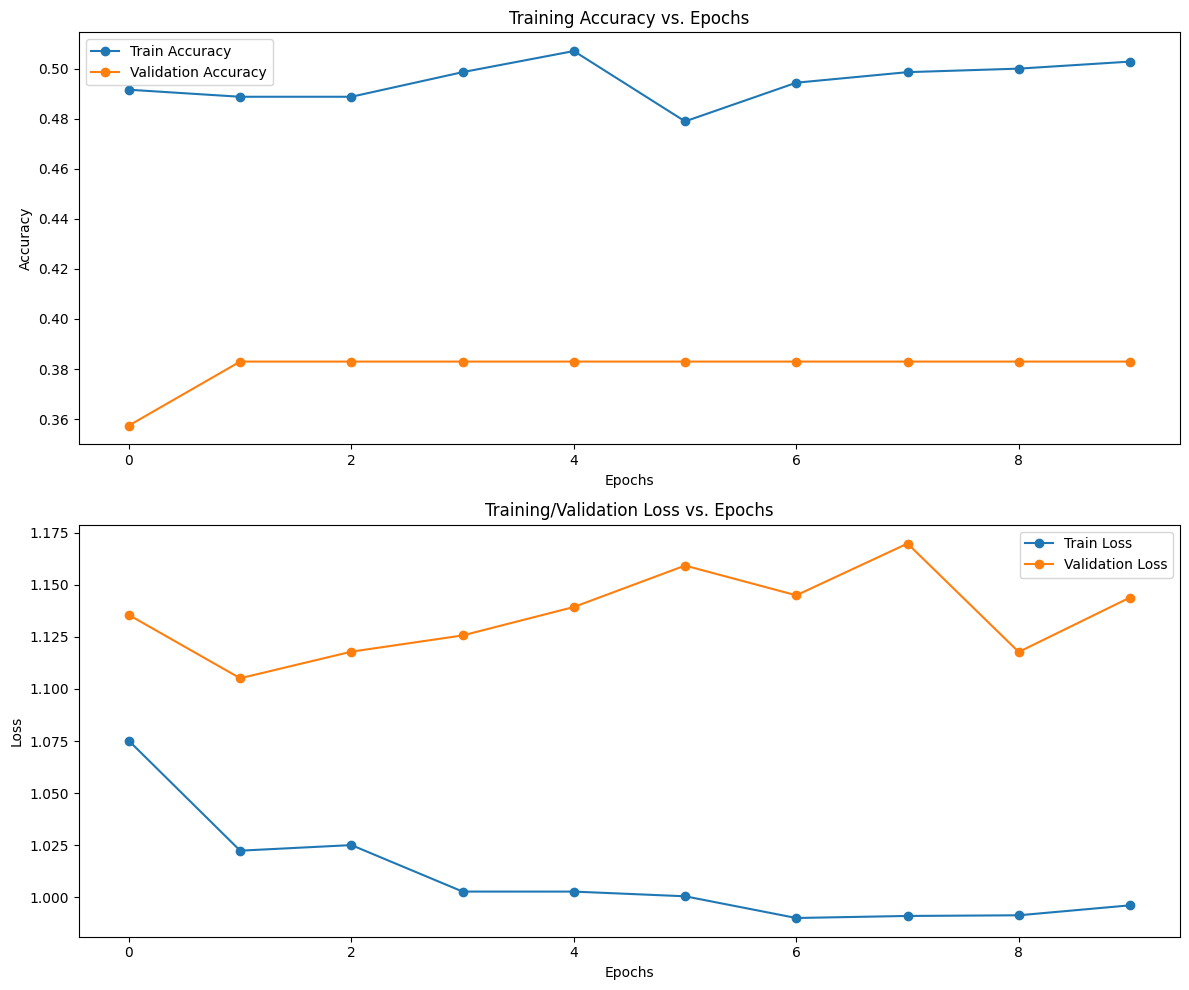

In [47]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')


plt.tight_layout()
plt.show()